<a href="https://colab.research.google.com/github/JGPB0/CS/blob/main/Lab2/CS_Lab2_ParedesJimmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Symmetric Key
## Paredes Jimmy

## Exercise 1: OpenSSL.

###1. Outline five encryption methods that are supported by OpenSSL. \# openssl enc -list
Some encryption methods supported by openssl are:
  * aes
  * aria
  * camellia
  * des
  * blowfish

###2. Outline the version of OpenSSL. \# openssl version
OpenSSL 3.0.11 19 Sep 2023 (Library: OpenSSL 3.0.11 19 Sep 2023)

###3. Outline the help of OpenSSL. \# openssl -help
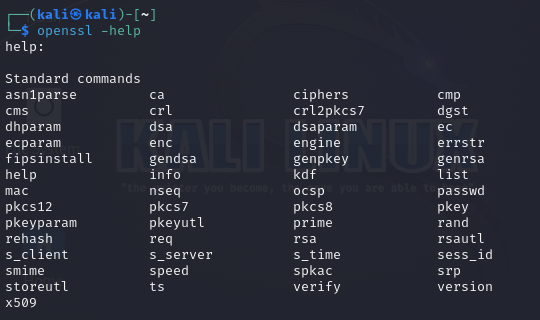

###4. Using openssl and the command in the form. \# openssl prime 1111
  * check if the following are prime numbers:
    * 16340690919010772729
    * 3218553137707046031277850554278875389372
    * 108413135436976585570533402883129530221352335126040176869642726536380775978251
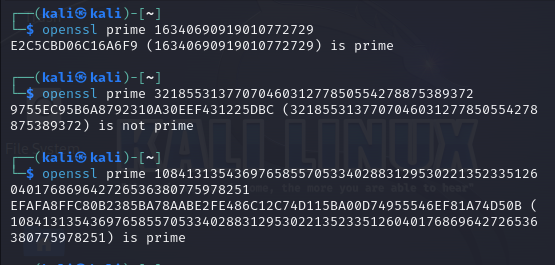

###5. Using OpenSSL command to generate a random prime number of 4096 bits: \# openssl prime -generate -bits 4096
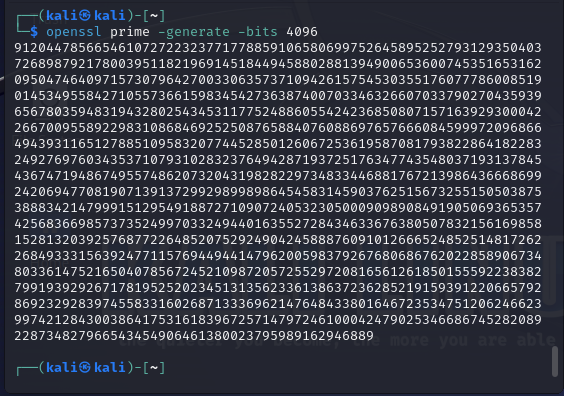












###6. Now create a file named myfile.txt .
  * Next encrypt with aes-256-cbc
    * \# openssl enc -aes-256-cbc -in myfile.txt -out encrypted.bin
    * and enter your password.
    * Use following command to view the output file: cat encrypted.bin
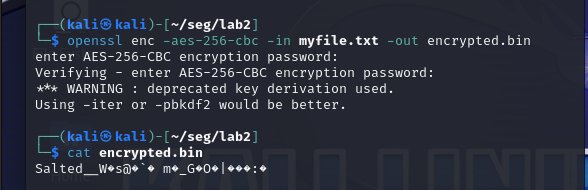
    

###7. Now repeat the previous command and add the -base64 option.
  * openssl enc -aes-256-cbc -in myfile.txt -out encrypted.bin -base64
  * Use following command to view the output file: cat encrypted.bin
  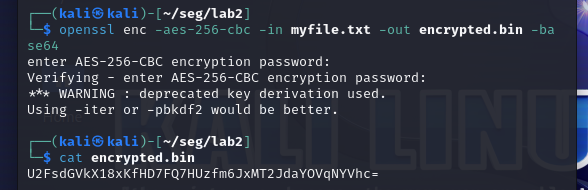

###8. Now, repeat the previous command and observe the encrypted output.
  * openssl enc -aes-256-cbc -in myfile.txt -out encrypted.bin -pbkdf2 -base64
  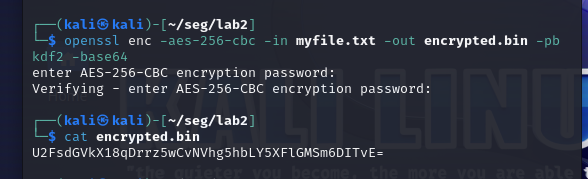

  * Has the output changed? **Yes**

  * Why has it changed? \\
  It has changed because using **-pbkdf2** helps us to have more security in our encrypoted file because it is an key derivation function which is resistant to dictionary attacks.

###9. Now lets decrypt the encrypted file with the correct format:
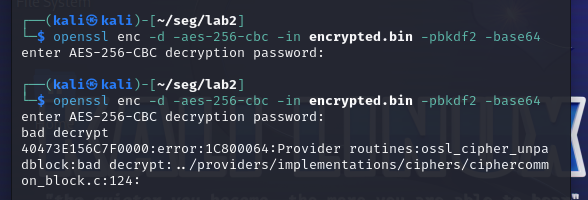

  * openssl enc -d -aes-256-cbc -in encrypted.bin -pbkdf2 -base64

  * Has the output been decrypted correctly? **Yes**
  
  * What happens when you use the wrong password? \\
  It results in an error in the decrypt.


###10. Now encrypt a file with Blowfish and see if Did you manage to decrypt the you can decrypt it.
  * Did you manage to decrypt the file? **Yes** \\

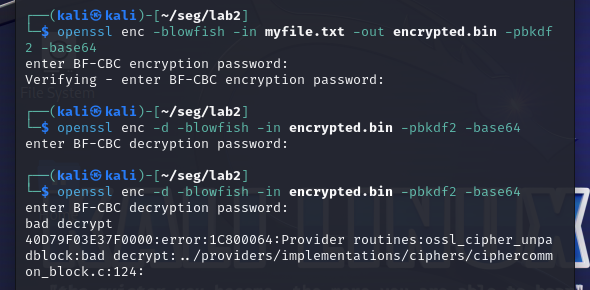

Yes, it is possible to decrypt the file when using the password and it is not pissible when using another password.




###11. Now encrypt a file with 3DES and see if Did you manage to decrypt the you can decrypt it.
  * Did you manage to decrypt the file? **Yes**
  
  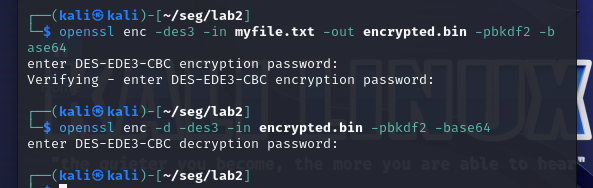



###12. Now encrypt a file with RC2 and see if Did you manage to decrypt the you can decrypt it.
  * Did you manage to decrypt the file? **Yes**

  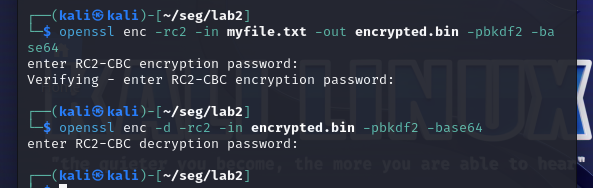

##Exercise 2: Padding (AES).

###1. Install the necessary cryptographic libraries for AES-256 encryption.
The necessary cryptographic libraries for AES-256 encryption have been already installed in kali.

###2. With AES which uses a 256-bit key, what is the normal block size (in bytes).
  * Block size (bytes): 16 bytes
  * Number of hex characters for block size: 32 hex characters

###3. Demonstrate the implementation of AES-256 encryption with different padding schemes using Python.

In [4]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

class ISO7816Padding(padding.PaddingContext):
    def __init__(self, block_size):
        self.block_size = block_size

    def update(self, data):
        padding_length = self.block_size - len(data) % self.block_size
        padding_value = bytes([padding_length] * padding_length)
        return data + padding_value

    def finalize(self):
        padding_length = self.block_size - 0 % self.block_size
        padding_value = bytes([padding_length] * padding_length)
        return padding_value

def aes_256_encrypt(message, key, padding_scheme):
    # Convert the message and key to bytes
    message_bytes = message.encode('utf-8')
    key_bytes = key.encode('utf-8')

    # Choose AES-256 algorithm, CBC mode, and the specified padding scheme
    algorithm = algorithms.AES(key_bytes)
    cipher = Cipher(algorithm, modes.CBC(b'\0' * 16), backend=default_backend())

    # Choose the appropriate padding scheme
    if padding_scheme == 'pkcs7':
        padder = padding.PKCS7(algorithm.block_size).padder()
    elif padding_scheme == 'iso7816':
        padder = ISO7816Padding(algorithm.block_size)
    else:
        raise ValueError("Invalid padding scheme")

    # Apply padding to the message
    padded_data = padder.update(message_bytes) + padder.finalize()

    # Encrypt the padded data
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()

    return ciphertext

# Test the function with different padding schemes
message = "This is a secret message."
key = "0123456789ABCDEF0123456789ABCDEF"

# Test with PKCS7 padding
ciphertext_pkcs7 = aes_256_encrypt(message, key, 'pkcs7')
print(f"Ciphertext with PKCS7 padding: {ciphertext_pkcs7.hex()}")

# Test with ISO7816 padding
ciphertext_iso7816 = aes_256_encrypt(message, key, 'iso7816')
print(f"Ciphertext with ISO7816 padding: {ciphertext_iso7816.hex()}")


Ciphertext with PKCS7 padding: 11c7e1da6eb1074da89f7ecace6f7539b3bd2d66abed24abf1866c3af9d8507a
Ciphertext with ISO7816 padding: 11c7e1da6eb1074da89f7ecace6f7539de533a71888609a8dd2d2875274532da96b701e11f8bfc74ff7036a0707c788b0015452d697985c8b4f9f2c5b76b8a8ac8052ca6c36a3c9cac072d262b5b8c637a2fb500d52a22e69d7078e76ebf54b4adc44fa6dc8e35f07213e614e187a32914d8dd3d86161eb50184c91783252f876d457df808e944479df609695e6f60e96776af00db7ecb70d1a81844987edc8eb152d0dcf5bb7dff6994b5413992eb23ce6835cd795e55e48652a4917f0b1e5710671d37fe3878c24493c03a8e624932f1c79ee547efbf9a2360d69eba6a0a3b4054277f4c39702c5944deb84710bdec7246a2c4229304809bfac5b9c97c2d0e



###4. Perform encryption and decryption tests using sample data and various padding schemes.

In [6]:
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

class ISO7816Padding(padding.PaddingContext):
    def __init__(self, block_size):
        self.block_size = block_size

    def update(self, data):
        padding_length = self.block_size - len(data) % self.block_size
        padding_value = bytes([padding_length] * padding_length)
        return data + padding_value

    def finalize(self):
        padding_length = self.block_size - 0 % self.block_size
        padding_value = bytes([padding_length] * padding_length)
        return padding_value

def aes_256_decrypt(ciphertext, key, padding_scheme):
    # Convert the key to bytes
    key_bytes = key.encode('utf-8')

    # Choose AES-256 algorithm, CBC mode, and the specified padding scheme
    algorithm = algorithms.AES(key_bytes)
    cipher = Cipher(algorithm, modes.CBC(b'\0' * 16), backend=default_backend())

    # Choose the appropriate padding scheme for decryption
    if padding_scheme == 'pkcs7':
        unpadder = padding.PKCS7(algorithm.block_size).unpadder()
    elif padding_scheme == 'iso7816':
        unpadder = ISO7816Padding(algorithm.block_size)  # No explicit unpadder for ISO7816
    else:
        raise ValueError("Invalid padding scheme")

    # Decrypt the ciphertext
    decryptor = cipher.decryptor()
    decrypted_data = decryptor.update(ciphertext) + decryptor.finalize()

    # Remove padding manually for ISO7816
    if padding_scheme == 'iso7816':
        padding_length = decrypted_data[-1]
        decrypted_data = decrypted_data[:-padding_length]

    return decrypted_data.decode('utf-8')

# Test the function with ISO7816 padding
ciphertext_iso7816 = aes_256_encrypt("This is a secret message.", "0123456789ABCDEF0123456789ABCDEF", 'iso7816')
decrypted_iso7816 = aes_256_decrypt(ciphertext_iso7816, "0123456789ABCDEF0123456789ABCDEF", 'iso7816')
print(f"Ciphertext with ISO7816 padding: {ciphertext_iso7816.hex()}")
print(f"Decrypted message with ISO7816 padding: {decrypted_iso7816}")


Ciphertext with ISO7816 padding: 11c7e1da6eb1074da89f7ecace6f7539de533a71888609a8dd2d2875274532da96b701e11f8bfc74ff7036a0707c788b0015452d697985c8b4f9f2c5b76b8a8ac8052ca6c36a3c9cac072d262b5b8c637a2fb500d52a22e69d7078e76ebf54b4adc44fa6dc8e35f07213e614e187a32914d8dd3d86161eb50184c91783252f876d457df808e944479df609695e6f60e96776af00db7ecb70d1a81844987edc8eb152d0dcf5bb7dff6994b5413992eb23ce6835cd795e55e48652a4917f0b1e5710671d37fe3878c24493c03a8e624932f1c79ee547efbf9a2360d69eba6a0a3b4054277f4c39702c5944deb84710bdec7246a2c4229304809bfac5b9c97c2d0e
Decrypted message with ISO7816 padding: This is a secret message.ggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg


## Exercise 3. Padding (DES)

###1. With DES which uses a 64-bit key, what is the normal block size (in bytes):
  * Block size (bytes): 8 bytes.
  * Number of hex characters for block size: 16 hex characters.

###2. Demonstrate the implementation of DES encryption with different padding schemes using Python.

In [8]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.2 MB/s eta 0:00:00


In [9]:
from Crypto.Cipher import DES3
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

def des3_encrypt(message, key, padding_scheme):
    # Generate a random IV (Initialization Vector)
    iv = get_random_bytes(8)

    # Create a DES3 cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Pad the message based on the specified scheme
    if padding_scheme == 'pkcs7':
        padded_message = pad(message.encode('utf-8'), DES3.block_size)
    elif padding_scheme == 'iso7816':
        padding_length = DES3.block_size - len(message) % DES3.block_size
        padded_message = message.encode('utf-8') + bytes([padding_length] * padding_length)
    else:
        raise ValueError("Invalid padding scheme")

    # Encrypt the padded message
    ciphertext = cipher.encrypt(padded_message)

    # Combine IV and ciphertext for later use in decryption
    encrypted_data = iv + ciphertext

    return encrypted_data

def des3_decrypt(ciphertext, key, padding_scheme):
    # Extract IV from the ciphertext
    iv = ciphertext[:8]
    ciphertext = ciphertext[8:]

    # Create a DES3 cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Decrypt the ciphertext
    decrypted_data = cipher.decrypt(ciphertext)

    # Unpad the decrypted data based on the specified scheme
    if padding_scheme == 'pkcs7':
        unpadded_data = unpad(decrypted_data, DES3.block_size)
    elif padding_scheme == 'iso7816':
        # Extract the padding length from the last byte
        padding_length = decrypted_data[-1]
        unpadded_data = decrypted_data[:-padding_length]
    else:
        raise ValueError("Invalid padding scheme")

    return unpadded_data.decode('utf-8')

# Example usage
key = get_random_bytes(24)  # 24 bytes for DES3 (3 DES keys)
message = "Hello, DES encryption!"
padding_schemes = ['pkcs7', 'iso7816']

for scheme in padding_schemes:
    encrypted_data = des3_encrypt(message, key, scheme)
    decrypted_message = des3_decrypt(encrypted_data, key, scheme)

    print(f"Padding Scheme: {scheme}")
    print(f"Original Message: {message}")
    print(f"Encrypted Data: {encrypted_data.hex()}")
    print(f"Decrypted Message: {decrypted_message}")
    print("=" * 40)


Padding Scheme: pkcs7
Original Message: Hello, DES encryption!
Encrypted Data: 0850217c89167e665d9c8b4baa096e4b45db822c5682a0df9b05c5eb9dd8c11d
Decrypted Message: Hello, DES encryption!
Padding Scheme: iso7816
Original Message: Hello, DES encryption!
Encrypted Data: 7250c5d2d0d17b4475a2359be25f5ceea9921ae979556add69a79856ec46b547
Decrypted Message: Hello, DES encryption!



###3. Perform encryption and decryption tests using sample data and various padding schemes.

In [10]:
from Crypto.Cipher import DES3
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

def des3_encrypt(message, key, padding_scheme):
    # Generate a random IV (Initialization Vector)
    iv = get_random_bytes(8)

    # Create a DES3 cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Pad the message based on the specified scheme
    if padding_scheme == 'pkcs7':
        padded_message = pad(message.encode('utf-8'), DES3.block_size)
    elif padding_scheme == 'iso7816':
        padding_length = DES3.block_size - len(message) % DES3.block_size
        padded_message = message.encode('utf-8') + bytes([padding_length] * padding_length)
    else:
        raise ValueError("Invalid padding scheme")

    # Encrypt the padded message
    ciphertext = cipher.encrypt(padded_message)

    # Combine IV and ciphertext for later use in decryption
    encrypted_data = iv + ciphertext

    return encrypted_data

def des3_decrypt(ciphertext, key, padding_scheme):
    # Extract IV from the ciphertext
    iv = ciphertext[:8]
    ciphertext = ciphertext[8:]

    # Create a DES3 cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Decrypt the ciphertext
    decrypted_data = cipher.decrypt(ciphertext)

    # Unpad the decrypted data based on the specified scheme
    if padding_scheme == 'pkcs7':
        unpadded_data = unpad(decrypted_data, DES3.block_size)
    elif padding_scheme == 'iso7816':
        # Extract the padding length from the last byte
        padding_length = decrypted_data[-1]
        unpadded_data = decrypted_data[:-padding_length]
    else:
        raise ValueError("Invalid padding scheme")

    return unpadded_data.decode('utf-8')

# Sample data
key = get_random_bytes(24)  # 24 bytes for DES3 (3 DES keys)
message = "Hello, DES encryption!"
padding_schemes = ['pkcs7', 'iso7816']

# Perform encryption and decryption tests
for scheme in padding_schemes:
    encrypted_data = des3_encrypt(message, key, scheme)
    decrypted_message = des3_decrypt(encrypted_data, key, scheme)

    print(f"Padding Scheme: {scheme}")
    print(f"Original Message: {message}")
    print(f"Encrypted Data: {encrypted_data.hex()}")
    print(f"Decrypted Message: {decrypted_message}")
    print("=" * 40)


Padding Scheme: pkcs7
Original Message: Hello, DES encryption!
Encrypted Data: 3b942ec55d099bbcb70a672ddf6dbf475c3c0f2ac009912250074d4c8a8bea42
Decrypted Message: Hello, DES encryption!
Padding Scheme: iso7816
Original Message: Hello, DES encryption!
Encrypted Data: 6ac8f725787579c0f0812dda4f5ae3891ab51fc7f2e57a88cfb1775598e38bb5
Decrypted Message: Hello, DES encryption!


##Exercise 4. Python Coding (Encrypting)

###1. Update the code so that you can enter a string and the program will show the cipher text. The format will be something like:
  * python cipher01.py hello mykey \\

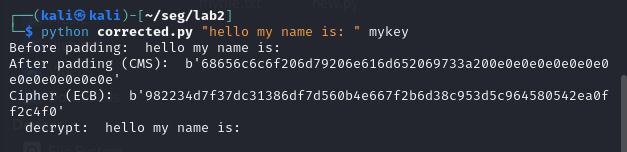

The corrected code is the following:

In [11]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend

import hashlib
import sys
import binascii

def encrypt(plaintext, key, mode):
    method = algorithms.AES(key)
    cipher = Cipher(method, mode, default_backend())
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return ct

def decrypt(ciphertext, key, mode):
    method = algorithms.AES(key)
    cipher = Cipher(method, mode, default_backend())
    decryptor = cipher.decryptor()
    pl = decryptor.update(ciphertext) + decryptor.finalize()
    return pl

def pad(data, size=128):
    padder = padding.PKCS7(size).padder()
    padded_data = padder.update(data)
    padded_data += padder.finalize()
    return padded_data

def unpad(data, size=128):
    padder = padding.PKCS7(size).unpadder()
    unpadded_data = padder.update(data)
    unpadded_data += padder.finalize()
    return unpadded_data

if len(sys.argv) != 3:
    print("Usage: python cipher01.py <plaintext> <key>")
    sys.exit(1)

plaintext = sys.argv[1]
password = sys.argv[2]

key = hashlib.sha256(password.encode()).digest()

print("Before padding: ", plaintext)

plaintext = pad(plaintext.encode())

print("After padding (CMS): ", binascii.hexlify(bytearray(plaintext)))

ciphertext = encrypt(plaintext, key, modes.ECB())
print("Cipher (ECB): ", binascii.hexlify(bytearray(ciphertext)))

plaintext = decrypt(ciphertext, key, modes.ECB())

plaintext = unpad(plaintext)
print("  decrypt: ", plaintext.decode())


Before padding:  -f
After padding (CMS):  b'2d660e0e0e0e0e0e0e0e0e0e0e0e0e0e'
Cipher (ECB):  b'984f0f8572d8d2d89e37af0f5042de7b'
  decrypt:  -f


###2. Now determine the cipher text for the following (the first example has already been completed):

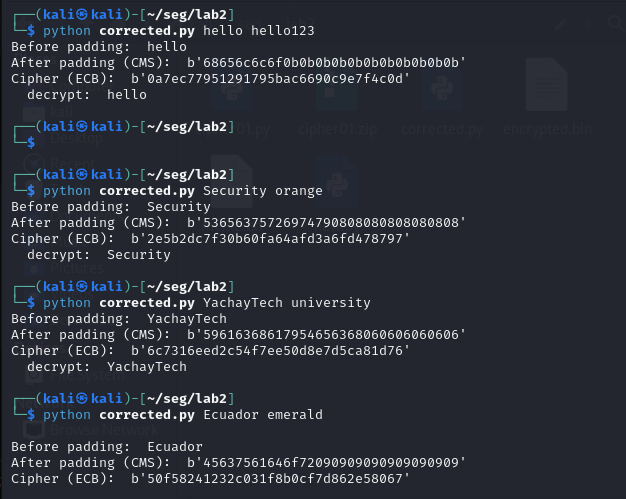

In [18]:
import pandas as pd

data = {
    "Message": ["hello", "Security", "YachayTech", "Ecuador"],
    "Key": ["hello123", "orange", "university", "emerald"],
    "CMS Cipher": ["0a7ec77951291795bac6690c9e7f4c0d", "2e5b2dc7f30b60fa64afd3a6fd478797",
                   "6c7316eed2c54f7ee50d8e7d5ca81d76", "50f58241232c031f8b0cf7d862e58067"],
}

df = pd.DataFrame(data)

print(df)


      Message         Key                        CMS Cipher
0       hello    hello123  0a7ec77951291795bac6690c9e7f4c0d
1    Security      orange  2e5b2dc7f30b60fa64afd3a6fd478797
2  YachayTech  university  6c7316eed2c54f7ee50d8e7d5ca81d76
3     Ecuador     emerald  50f58241232c031f8b0cf7d862e58067


###3. Copy your code and modify it so that it implements 64-bit DES and complete the table



In [25]:
from Crypto.Cipher import DES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import binascii

def des_encrypt(message, key):
    cipher = DES.new(key, DES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode('utf-8'), DES.block_size))
    return binascii.hexlify(ciphertext).decode('utf-8')

def des_decrypt(ciphertext, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted_data = unpad(cipher.decrypt(binascii.unhexlify(ciphertext)), DES.block_size)
    return decrypted_data.decode('utf-8')

data = {
    "Message": ["hello", "Security", "YachayTech", "Ecuador"],
    "Key": ["hello123", "orange", "university", "emerald"],
    "CMS Cipher": ["", "", "", ""],
}

# Complete the table with 64-bit DES encryption
for i in range(len(data["Message"])):
    if i >= 0:
        message = data["Message"][i]
        ciphertext = des_encrypt(message, key)
        data["CMS Cipher"][i] = ciphertext

df = pd.DataFrame(data)
print(df)


      Message         Key                        CMS Cipher
0       hello    hello123                  dfa9ee653d619875
1    Security      orange  19c4d96ce89431ce1b27483f73eba0c9
2  YachayTech  university  bd11369e57674c68a873cab53328b3b7
3     Ecuador     emerald                  beb32c63e095c4e4


###4. Modify the code so that the user can enter the values from the keyboard, such as with:
  * cipher=raw_input(’Enter cipher:’)
  * password=raw_input(’Enter password:’)

  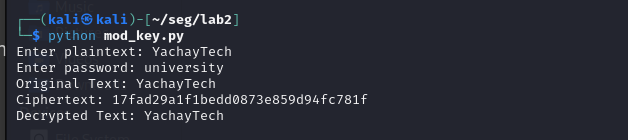

  The text modified is the following:

In [ ]:
from Crypto.Cipher import DES
from Crypto.Util.Padding import pad, unpad
import binascii

def des_encrypt(message, key):
    cipher = DES.new(key, DES.MODE_ECB)
    ciphertext = cipher.encrypt(pad(message.encode('utf-8'), DES.block_size))
    return binascii.hexlify(ciphertext).decode('utf-8')

def des_decrypt(ciphertext, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted_data = unpad(cipher.decrypt(binascii.unhexlify(ciphertext)), DES.block_size)
    return decrypted_data.decode('utf-8')

# User input
plaintext = input("Enter plaintext: ")
password = input("Enter password: ")

# Generate a 64-bit DES key from the password
key = password.encode('utf-8')
key = key[:8]  # Use only the first 8 bytes for DES

# Encryption and decryption
ciphertext = des_encrypt(plaintext, key)
decrypted_text = des_decrypt(ciphertext, key)

# Display results
print(f"Original Text: {plaintext}")
print(f"Ciphertext: {ciphertext}")
print(f"Decrypted Text: {decrypted_text}")


##Exercise 7. Stream Ciphers

###1. Develop an application in Python to implement the ChaCha20 stream cipher.

In [44]:
from Crypto.Cipher import ChaCha20
from Crypto.Random import get_random_bytes

def chacha20_encrypt(key, nonce, plaintext):
    cipher = ChaCha20.new(key=key, nonce=nonce)
    ciphertext = cipher.encrypt(plaintext)
    return ciphertext

def chacha20_decrypt(key, nonce, ciphertext):
    cipher = ChaCha20.new(key=key, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext

def main():
    # Example key and nonce (you should use a secure way to generate these in a real application)
    key = get_random_bytes(32)
    nonce = get_random_bytes(8)

    # Example plaintext
    plaintext = b"Hello, ChaCha20!"

    # Encrypt
    ciphertext = chacha20_encrypt(key, nonce, plaintext)
    print(f"Ciphertext: {ciphertext.hex()}")

    # Decrypt
    decrypted_text = chacha20_decrypt(key, nonce, ciphertext)
    print(f"Decrypted text: {decrypted_text.decode('utf-8')}")

if __name__ == "__main__":
    main()


Ciphertext: 5f40b3ab040690596ab28d818ad9e075
Decrypted text: Hello, ChaCha20!


###2. If we use a key of qwerty, nonce = 0x0000000000000000 can you find the well-known fruits (in lower case) of the following ChaCha20 cipher streams:
  * e81461e995
  * eb057fe49e34
  * e8127ee691315e
  * fb0562f592304385d4

In [73]:
def main():
    # Generate a random 32-byte key
    key = get_random_bytes(32)
    nonce = b'\x00\x00\x00\x00\x00\x00\x00\x00'

    ciphertexts = [
        b'e81461e995',
        b'eb057fe49e34',
        b'e8127ee691315e',
        b'fb0562f592304385d4'
    ]

    for ct_hex in ciphertexts:
        ciphertext = bytes.fromhex(ct_hex.decode('utf-8'))
        decrypted_text = chacha20_decrypt(key, nonce, ciphertext)
        print(f"Ciphertext: {ct_hex.decode('utf-8')}, Decrypted text (hex): {decrypted_text.hex()}")

if __name__ == "__main__":
    main()


Ciphertext: e81461e995, Decrypted text (hex): 34b62829f8
Ciphertext: eb057fe49e34, Decrypted text (hex): 37a73624f3a1
Ciphertext: e8127ee691315e, Decrypted text (hex): 34b03726fca477
Ciphertext: fb0562f592304385d4, Decrypted text (hex): 27a72b35ffa56a746a


###3. RC4 is a standard stream cipher and can be used for light-weight cryptog-raphy. Develop an application in Python to implement the RC4 stream cipher.

In [75]:
class RC4:
    def __init__(self, key):
        self.key = key

    def key_schedule(self):
        key_length = len(self.key)
        S = list(range(256))
        j = 0
        for i in range(256):
            j = (j + S[i] + self.key[i % key_length]) % 256
            S[i], S[j] = S[j], S[i]
        return S

    def encrypt(self, plaintext):
        S = self.key_schedule()
        i = j = 0
        ciphertext = []
        for char in plaintext:
            i = (i + 1) % 256
            j = (j + S[i]) % 256
            S[i], S[j] = S[j], S[i]
            key_byte = S[(S[i] + S[j]) % 256]
            ciphertext.append(char ^ key_byte)
        return bytes(ciphertext)

    def decrypt(self, ciphertext):
        return self.encrypt(ciphertext)  # RC4 is symmetric, encryption and decryption are the same

def main():
    key = b"example_key"
    plaintext = b"Hello, RC4! This is a sample message."

    rc4_cipher = RC4(key)

    ciphertext = rc4_cipher.encrypt(plaintext)
    decrypted_text = rc4_cipher.decrypt(ciphertext)

    print("\nResults:")
    print(f"Plaintext: {plaintext.decode('utf-8')}")
    print(f"Key: {key.decode('utf-8')}")
    print(f"Ciphertext (hex): {ciphertext.hex()}")
    print(f"Decrypted text: {decrypted_text.decode('utf-8')}")

if __name__ == "__main__":
    main()



Results:
Plaintext: Hello, RC4! This is a sample message.
Key: example_key
Ciphertext (hex): f69d13a08f2e6cdc261003fe82ad1872158550f1c024b6cc372ce56f1e3c4a436db65316ff
Decrypted text: Hello, RC4! This is a sample message.
